# <center>Import</center>

In [1]:
from genetic_algorithms import GeneticAlgorithms

# import pandas as pd
import numpy as np
import csv
import time
import pickle
# import copy
import math

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
# Make the graphs a bit prettier, and bigger
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# <center>Function definition</center>

In [2]:
def save_to_pickle_file(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_pickle_file(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
    
# read solution
def read_solution(filename):
    with open(filename, 'r') as sol_file:
        reader = csv.reader(sol_file, delimiter=' ', skipinitialspace=True)
        cost_sol = []
        
        for row in reader:
            cost_sol.append(int(row[2]))
            
        return cost_sol

## <center>HW 4</center>

In [75]:
def measure_time4(filename, solution_file, generation_num, population_size, 
                  elitism=True, selection='rank', tournament_size=None,
                  mut_type=1, mut_prob=0.05, cross_type=1, cross_prob=0.95,
                  print_out=True):
    with open(filename, 'r') as inst_file:
        reader = csv.reader(inst_file, delimiter=' ', skipinitialspace=True)
        
        solution_list = read_solution(solution_file)

        dupl_counter = 1
        dupl_counter_delta = 0.00001
        for row, solution in zip(reader, solution_list):
            n = int(row[1])
            M = int(row[2])

            pairs = {}
            for i in range(0, n*2 - 1, 2):
                if int(row[i + 3]) in pairs.keys():
                    # duplication found!
                    if print_out:
                        print(10*'-', 'File:', filename, 'row:', row[0], 'There is a duplicate key!', 10*'-')
                    
                    new_key = int(row[i + 3]) + dupl_counter*dupl_counter_delta
                    
                    dupl_counter += 1
                else:
                    new_key = int(row[i + 3])
                    
                # pair: weight - cost
                pairs[new_key] = int(row[i + 4])

            # define fitness function
            def fitness_func(bin_list, keys):
                cost = 0

                for idx in bin_list:
                    cost += pairs[keys[idx]]
                    
                if selection == 'roulette':
                    # we need to modify rel.error (fitness) in case of minimization, 
                    # because 'roulette' type has more chances to select individual 
                    # with higher rel. error 
                    return 1 - abs((solution - cost) / solution)
                else:
                    return abs((solution - cost) / solution)
            
            if selection == 'roulette':
                optim = 'max'
            else:
                optim = 'min'
            
            # run genetic algorithm
            if selection == 'tournament':
                ga = GeneticAlgorithms(list(pairs.keys()), fitness_func, optim=optim, 
                                       elitism=elitism, selection=selection, 
                                       mut_type=mut_type, mut_prob=mut_prob,
                                       cross_type=cross_type, cross_prob=cross_prob,
                                       tournament_size=tournament_size)
            else:
                ga = GeneticAlgorithms(list(pairs.keys()), fitness_func, optim=optim, 
                                       elitism=elitism, selection=selection, 
                                       mut_type=mut_type, mut_prob=mut_prob,
                                       cross_type=cross_type, cross_prob=cross_prob)
            
            start_time = time.process_time()
            ga.init_random_population(population_size)
            end_time = time.process_time()
            init_time = end_time - start_time
            print('Random initialization:', init_time)
            
            start_time = time.process_time()
            fitness_progress = ga.run(generation_num)
            end_time = time.process_time()
            run_time = end_time - start_time
            print('GA run:', run_time)
            
            break
            
    return fitness_progress, init_time + run_time

# <center>Computation</center>

### Define file for saving/loading data

In [5]:
# save or load data to/from this file
result_file4 = 'result4'

## <center>HW 4</center>

### Load previously computed results from a file

In [13]:
# load computed results from the file
dictn4 = load_pickle_file(result_file4)

### Or run a new computation

In [76]:
# n_list = [4,10,15,20,22,25,27,30,32,35,37,40]
n_list = [40]

# GA standard properties
generation_num = 100
population_size = 1000
elitism = True
selection = 'rank'
tournament_size = n_list[0] # in case of tournament selection
mut_type = 1
mut_prob = 0.05
cross_type = 1
cross_prob = 0.95

# GA test values of parameters
population_size_list = [50, 500, 1000, 1500, 2000]
selection_list = ['rank', 'roulette', 'tournament']
tournament_size_list = [100, 5000, n_list[0]]
elitism_list = [True, False]

# single point, two point, multiple point and uniform mutation/crossover
mut_type_list = [1, 2, n_list[0] // 2, n_list[0]]
cross_type_list = [1, 2, n_list[0] // 2, n_list[0]]

mut_prob_list = [0.05, 0.5, 1]
cross_prob_list = [0.3, 0.6, 0.95]


file_inst_template = './data/inst/knap_{}.inst.dat'
file_sol_template = './data/sol/knap_{}.sol.dat'
# dictn4 = {}

test_parameters = selection_list
# test names: population, selection, tournament, elitism, mut_type, cross_type, mut_prob, cross_prob
test_name = 'selection'
for n in n_list:
#     dictn4[n] = {}
    dictn4[n][test_name] = {}
    for param in test_parameters:
        dictn4[n][test_name][param] = {}
        # replace standard parameter with the test one
        dictn4[n][test_name][param] = list(measure_time4(file_inst_template.format(n), 
                                                         file_sol_template.format(n), 
                                                         generation_num, # number of generations
                                                         population_size, # population size
                                                         selection=param, 
                                                         elitism=elitism, 
                                                         tournament_size=tournament_size, 
                                                         mut_type=mut_type, 
                                                         mut_prob=mut_prob, 
                                                         cross_type=cross_type, 
                                                         cross_prob=cross_prob, 
                                                         print_out=False
                                                        ))

Random initialization: 0.046875
GA run: 66.453125
Random initialization: 0.046875
GA run: 28.109375
Random initialization: 0.046875
GA run: 31.953125


### Save computed results

In [66]:
save_to_pickle_file(dictn4, result_file4)

# <center>Plots</center>

## <center>Data preparation</center>

### HW 4

In [7]:
# load computed results from the file
dictn4 = load_pickle_file(result_file4)

## <center>Plotting</center>

### HW 4

In [22]:
x = [x for x in range(generation_num + 1)]

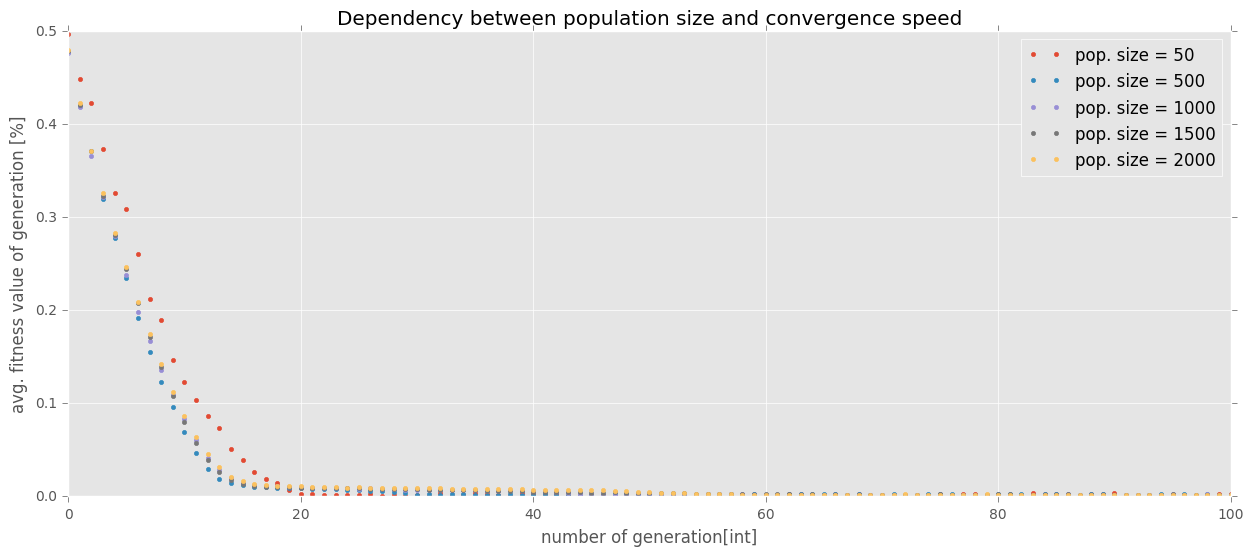

In [65]:
plt.plot(x, dictn4[40]['population'][50][0], '.', label='pop. size = 50')
plt.plot(x, dictn4[40]['population'][500][0], '.', label='pop. size = 500')
plt.plot(x, dictn4[40]['population'][1000][0], '.', label='pop. size = 1000')
plt.plot(x, dictn4[40]['population'][1500][0], '.', label='pop. size = 1500')
plt.plot(x, dictn4[40]['population'][2000][0], '.', label='pop. size = 2000')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between population size and convergence speed')

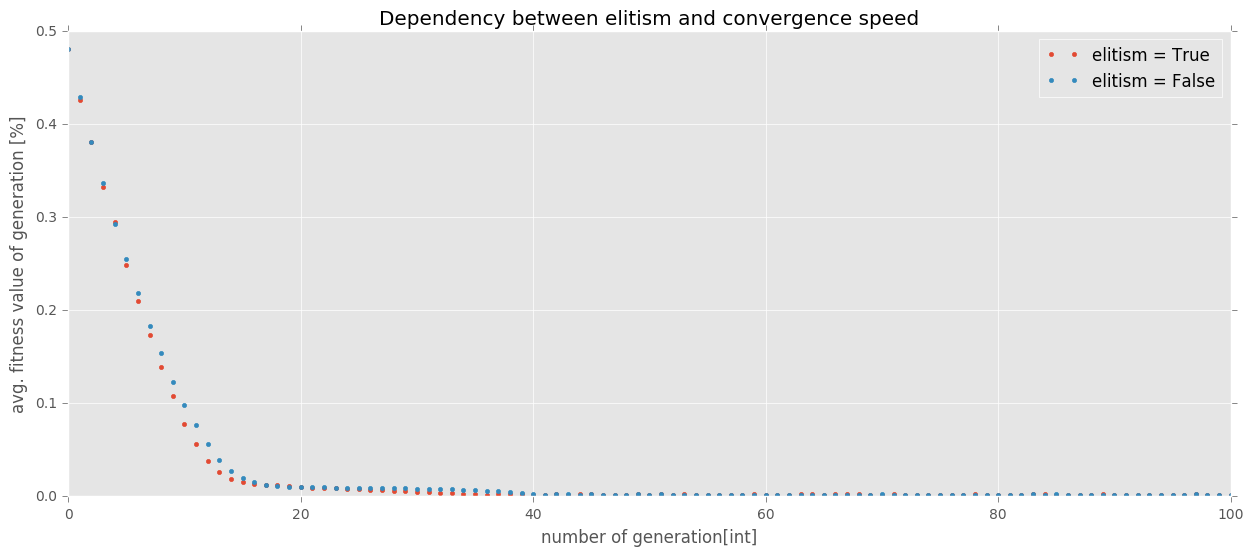

In [64]:
plt.plot(x, dictn4[40]['elitism'][True][0], '.', label='elitism = True')
plt.plot(x, dictn4[40]['elitism'][False][0], '.', label='elitism = False')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between elitism and convergence speed')

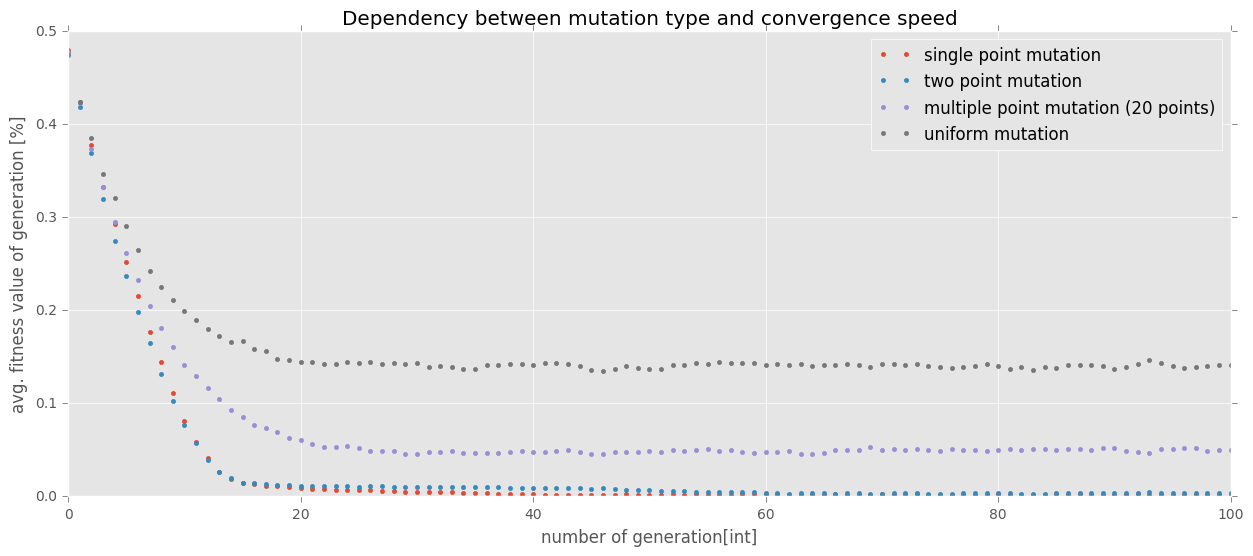

In [63]:
plt.plot(x, dictn4[40]['mut_type'][1][0], '.', label='single point mutation')
plt.plot(x, dictn4[40]['mut_type'][2][0], '.', label='two point mutation')
plt.plot(x, dictn4[40]['mut_type'][n_list[0] // 2][0], '.', 
         label='multiple point mutation (' + str(n_list[0] // 2) + ' points)')
plt.plot(x, dictn4[40]['mut_type'][n_list[0]][0], '.', label='uniform mutation')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between mutation type and convergence speed')

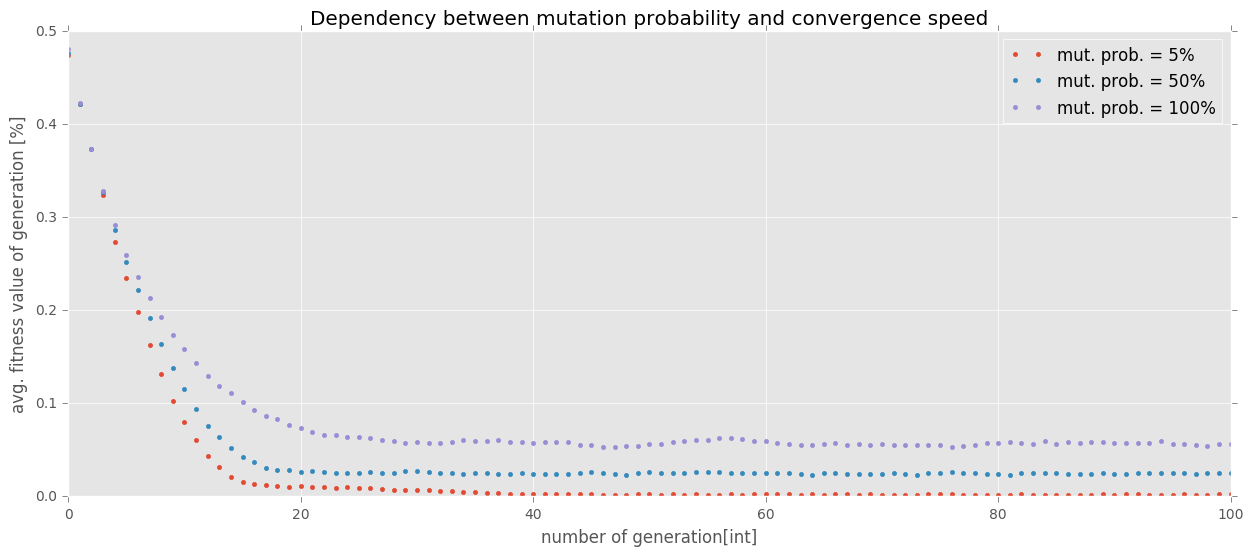

In [62]:
plt.plot(x, dictn4[40]['mut_prob'][0.05][0], '.', label='mut. prob. = 5%')
plt.plot(x, dictn4[40]['mut_prob'][0.5][0], '.', label='mut. prob. = 50%')
plt.plot(x, dictn4[40]['mut_prob'][1][0], '.', label='mut. prob. = 100%')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between mutation probability and convergence speed')

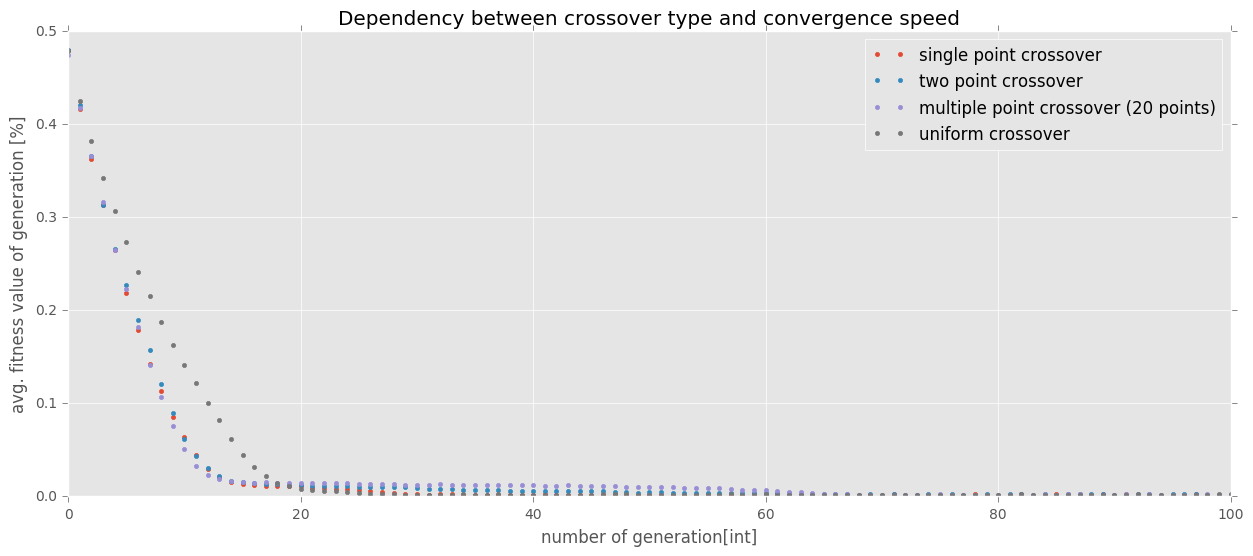

In [61]:
plt.plot(x, dictn4[40]['cross_type'][1][0], '.', label='single point crossover')
plt.plot(x, dictn4[40]['cross_type'][2][0], '.', label='two point crossover')
plt.plot(x, dictn4[40]['cross_type'][n_list[0] // 2][0], '.', 
         label='multiple point crossover (' + str(n_list[0] // 2) + ' points)')
plt.plot(x, dictn4[40]['cross_type'][n_list[0]][0], '.', label='uniform crossover')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between crossover type and convergence speed')

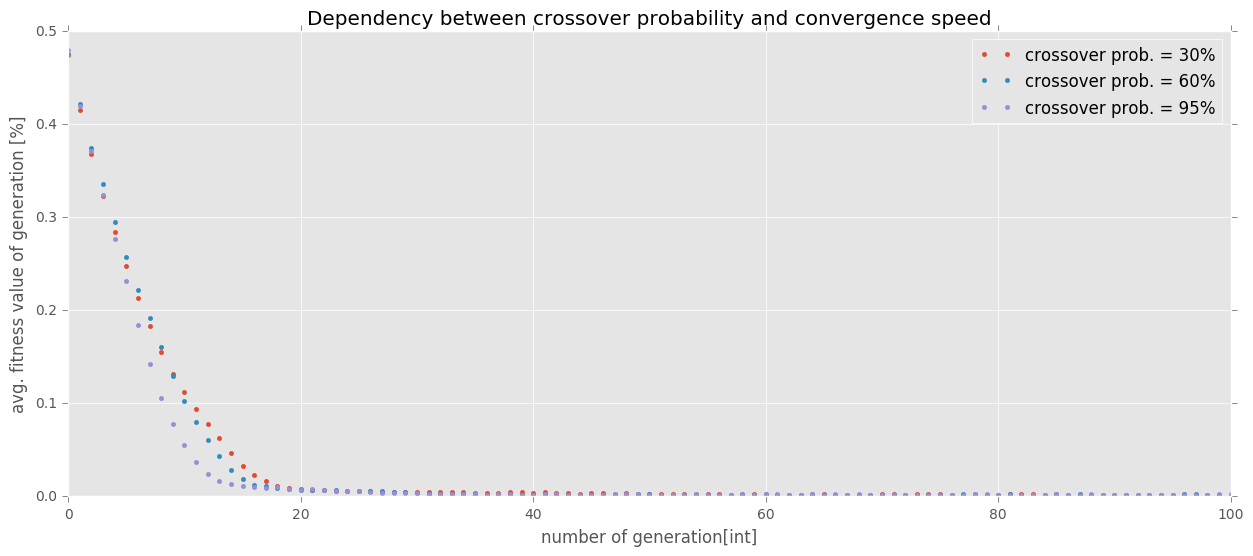

In [60]:
plt.plot(x, dictn4[40]['cross_prob'][0.3][0], '.', label='crossover prob. = 30%')
plt.plot(x, dictn4[40]['cross_prob'][0.6][0], '.', label='crossover prob. = 60%')
plt.plot(x, dictn4[40]['cross_prob'][0.95][0], '.', label='crossover prob. = 95%')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between crossover probability and convergence speed')

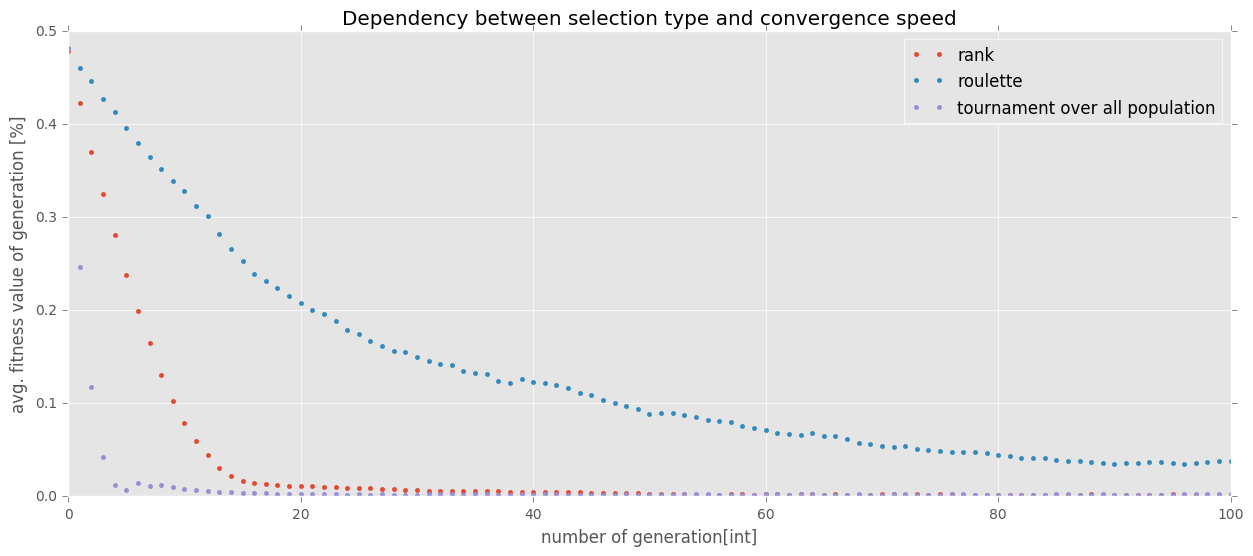

In [78]:
plt.plot(x, dictn4[40]['selection']['rank'][0], '.', label='rank')
plt.plot(x, [1 - y for y in dictn4[40]['selection']['roulette'][0]], '.', label='roulette')
plt.plot(x, dictn4[40]['selection']['tournament'][0], '.', label='tournament over all population')
plt.xlabel('number of generation[int]')
plt.ylabel('avg. fitness value of generation [%]')
plt.legend(loc='best')
plt.title('Dependency between selection type and convergence speed')

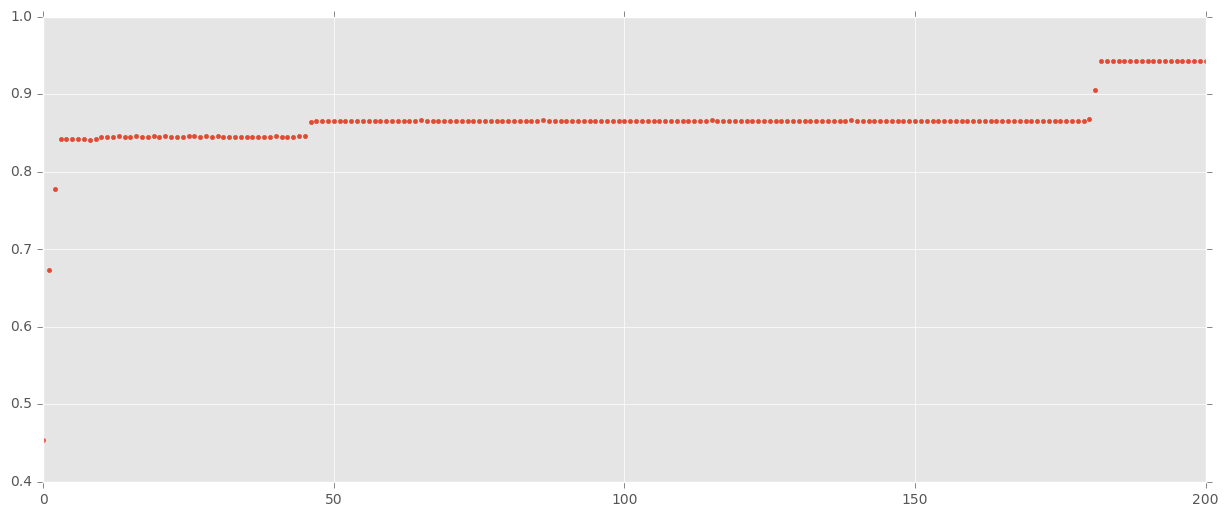

In [44]:
plt.plot(x, dictn4[32], '.')